In [15]:
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
from photutils import SkyCircularAperture, SkyCircularAnnulus
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import glob
from astropy.io import fits
from matplotlib.colors import LogNorm
from astropy.wcs import WCS
from pyspherematch import *
from photutils import CircularAperture, aperture_photometry, background

<b> LCRO Images </b>

In [16]:
file_list =  glob.glob("../../../Dropbox/LCRO_Images_Sem2_2016-17/Mar_13_SN_NGC5643/SNNGC5643*")

In [17]:
hdu_list = fits.open(file_list[1])
header = fits.getheader(file_list[1])
image_data = hdu_list[0].data
w = WCS(header)
hdu_list.close()

In [26]:
star_coords = SkyCoord( [218.14349] , [-44.134039] ,unit="deg" , frame='fk5')
apertures = SkyCircularAperture(star_coords, r=3* u.arcsec)
annulus_apertures = SkyCircularAnnulus(star_coords, r_in =3* u.arcsec, r_out =3.3* u.arcsec)
apers = [apertures, annulus_apertures]


phot_table = aperture_photometry(image_data, apers, wcs=w)
bkg_mean = phot_table['aperture_sum_1'] / annulus_apertures.to_pixel(w).area()
bkg_sum = bkg_mean * apertures.to_pixel(w).area()
final_sum = phot_table['aperture_sum_0'] - bkg_sum
phot_table['residual_aperture_sum'] = final_sum
phot_table

id,xcenter,ycenter,celestial_center,aperture_sum_0,aperture_sum_1,residual_aperture_sum
,pix,pix,"deg,deg",,,
int32,float64,float64,object,float64,float64,float64
1,2131.39175954,1856.37279665,"218.14349,-44.134039",376464.982656,41697.2245667,177906.770433


In [8]:
inst_mag = -2.5*np.log10(final_sum[0]/header['EXPTIME'])
jdate = header['JD']
exptime = header['EXPTIME']
filter_type = header['FILTER']

In [27]:
star_coords = SkyCoord( [218.14349] , [-44.134039] ,unit="deg" , frame='fk5')
apertures = SkyCircularAperture(star_coords, r=3* u.arcsec)
annulus_apertures = SkyCircularAnnulus(star_coords, r_in =3* u.arcsec, r_out =3.3* u.arcsec)
apers = [apertures, annulus_apertures]


inst_mag, jdate, exptime, filter_type = [], [] , [], []

for file_name in file_list:
    hdu_list = fits.open(file_name)
    header = fits.getheader(file_name)
    image_data = hdu_list[0].data
    w = WCS(header)
    hdu_list.close()
    
    phot_table = aperture_photometry(image_data, apers, wcs=w)
    bkg_mean = phot_table['aperture_sum_1'] / annulus_apertures.to_pixel(w).area()
    bkg_sum = bkg_mean * apertures.to_pixel(w).area()
    final_sum = phot_table['aperture_sum_0'] - bkg_sum

    inst_mag.append(-2.5*np.log10(final_sum[0]/header['EXPTIME']))
    jdate.append(header['JD'])
    exptime.append(header['EXPTIME'])
    filter_type.append(header['FILTER'])

(13.8, 14.6)

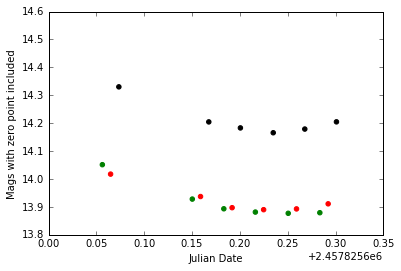

In [28]:
lcro_filters = ['g', 'r','i','H-Alpha']
lcro_zps = [20.10813, 19.78286, 19.0887, 0]
lcro_zpsfilters_dict = dict(zip(lcro_filters, lcro_zps))

corr_mag = [x+lcro_zpsfilters_dict.get(y) for x,y in zip(inst_mag, filter_type)]

plt.scatter(jdate, corr_mag, color=['green' if x=='g' else 'black' if x=='i' else 'red' if x=='r' else 'cyan' for x in filter_type])
plt.xlabel("Julian Date")
plt.ylabel("Mags with zero point included")
plt.ylim(13.8, 14.6)

In [11]:
header

SIMPLE  =                    T                                                  
BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     
NAXIS   =                    2 /number of axes                                  
NAXIS1  =                 4096 /fastest changing axis                           
NAXIS2  =                 4096 /next to fastest changing axis                   
BSCALE  =   1.0000000000000000 /physical = BZERO + BSCALE*array_value           
BZERO   =   32768.000000000000 /physical = BZERO + BSCALE*array_value           
DATE-OBS= '2017-03-13T09:24:53' / [ISO 8601] UTC date/time of exposure start    
EXPTIME =   6.00000000000E+002 / [sec] Duration of exposure                     
EXPOSURE=   6.00000000000E+002 / [sec] Duration of exposure                     
SET-TEMP=  -30.000000000000000 /CCD temperature setpoint in C                   
CCD-TEMP=  -30.000000000000000 /CCD temperature at start of exposure in C       
XPIXSZ  =   9.00000000000000

<b> TO DO: </b> get zero-points...don't trust Maxim derived points.

<b> CTIO </b>

In [33]:
file_list =  glob.glob("../../../Dropbox/LCRO_Images_Sem2_2016-17/Mar_14_SN_NGC5643_CTIO/*.fits")

In [36]:
file_name = file_list[-1]
hdu_list = fits.open(file_name)
header = fits.getheader(file_name)
image_data = hdu_list[0].data
w = WCS(header)
hdu_list.close()

PIXXMIT                        / Number of pixels returned per ADC go            [astropy.io.fits.card]
PIXOFFST                       / Valid pixel offset within ADC go                [astropy.io.fits.card]


In [37]:
header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1024 / Axis length                                    
NAXIS2  =                 1024 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2017-03-14T14:11:51' / Date FITS file was generated                  
IRAF-TLM= '2017-03-14T14:11:51' / Time of last modification                     
OBJECT  = 'SN-NGC-5643'        / Name of the object observed                    
COMMENT                    DATA FORMAT                                          
FORMAT  = 'DELACED '           / Data interlacing & coadding info               
COMMENT              ARRAY C

In [38]:
file_list =  glob.glob("../../../Dropbox/LCRO_Images_Sem2_2016-17/Mar_14_SN_NGC5643_CTIO_astrometry/*.fits")

inst_mag, jdate, exptime, filter_type = [], [] , [], []

for file_name in file_list:
    print file_name
    hdu_list = fits.open(file_name)
    header = fits.getheader(file_name)
    image_data = hdu_list[0].data
    w = WCS(header)
    hdu_list.close()
    
    phot_table = aperture_photometry(image_data, apers, wcs=w)
    bkg_mean = phot_table['aperture_sum_1'] / annulus_apertures.to_pixel(w).area()
    bkg_sum = bkg_mean * apertures.to_pixel(w).area()
    final_sum = phot_table['aperture_sum_0'] - bkg_sum

    inst_mag.append(-2.5*np.log10(final_sum[0]/header['EXPTIME']))
    jdate.append(header['JD'])
    exptime.append(header['EXPTIME'])
    filter_type.append(header['CCDFLTID'])

../../../Dropbox/LCRO_Images_Sem2_2016-17/Mar_14_SN_NGC5643_CTIO_astrometry\rccd170313.0062.astrometry.fits
../../../Dropbox/LCRO_Images_Sem2_2016-17/Mar_14_SN_NGC5643_CTIO_astrometry\rccd170313.0063.astrometry.fits
../../../Dropbox/LCRO_Images_Sem2_2016-17/Mar_14_SN_NGC5643_CTIO_astrometry\rccd170313.0064.astrometry.fits
../../../Dropbox/LCRO_Images_Sem2_2016-17/Mar_14_SN_NGC5643_CTIO_astrometry\rccd170313.0065.astrometry.fits
../../../Dropbox/LCRO_Images_Sem2_2016-17/Mar_14_SN_NGC5643_CTIO_astrometry\rccd170313.0066.astrometry.fits
../../../Dropbox/LCRO_Images_Sem2_2016-17/Mar_14_SN_NGC5643_CTIO_astrometry\rccd170313.0067.astrometry.fits
../../../Dropbox/LCRO_Images_Sem2_2016-17/Mar_14_SN_NGC5643_CTIO_astrometry\rccd170313.0068.astrometry.fits
../../../Dropbox/LCRO_Images_Sem2_2016-17/Mar_14_SN_NGC5643_CTIO_astrometry\rccd170313.0069.astrometry.fits
../../../Dropbox/LCRO_Images_Sem2_2016-17/Mar_14_SN_NGC5643_CTIO_astrometry\rccd170313.0070.astrometry.fits
../../../Dropbox/LCRO_Images

TypeError: buffer is too small for requested array

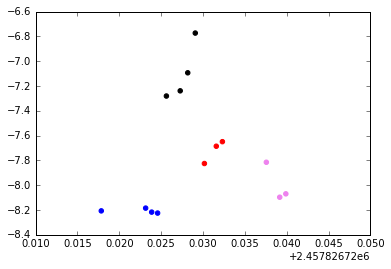

In [40]:
ctio_fil_list = ['B','I', 'R','V']
ctio_zero_points = []

plt.scatter(jdate, inst_mag, color=['blue' if x=='B' else 'black' if x=='I' else 'red' if x=='R' else 'violet' for x in filter_type])